In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# INSTRUCTION:
# change itv to generate results for 0.125, 0.25 ...
#-----------

import glob
interval = ["point125","point25","point5","point75"]
mode = "PLA"
all_data_files = dict()
for itv in interval:
    csv_dir = "../SHARCNET/Results/Tensorboard_to_CSV/single/gridsearch/"+itv+"/"
    plot_save_dir = './plots_for_thesis/single/gridsearch/'
    mode_data_files = glob.glob(csv_dir+"run_"+ mode +"*.csv")
    mode_data_files.sort()
    print("{} {}: {} files found".format(itv,mode,len(mode_data_files)))
    for f in mode_data_files:
        print(f)
    all_data_files[itv]=mode_data_files

point125 PLA: 1 files found
../SHARCNET/Results/Tensorboard_to_CSV/single/gridsearch/point125\run_PLA_1570006067gra34_file.csv
point25 PLA: 1 files found
../SHARCNET/Results/Tensorboard_to_CSV/single/gridsearch/point25\run_PLA_1570014319gra1125_file.csv
point5 PLA: 1 files found
../SHARCNET/Results/Tensorboard_to_CSV/single/gridsearch/point5\run_PLA_1570015405gra27_file.csv
point75 PLA: 1 files found
../SHARCNET/Results/Tensorboard_to_CSV/single/gridsearch/point75\run_PLA_1570018673gra39_file.csv


In [4]:
all_combined_data = dict()

for itv in interval:

    mode_data = []
    for file in all_data_files[itv]:
        mode_data.append(pd.read_csv(file))
        
    
    metrics = ["rollout/return"]
    mode_combined_data = pd.DataFrame()
    for metric in metrics:
        metric_combined_data = pd.DataFrame()
        for i in range(len(all_data_files[itv])):
            metric_combined_data[metric+"_run"+str(i)] = mode_data[i][metric]
        metric_combined_data[metric+"_avg"] = metric_combined_data.mean(axis=1)
        metric_combined_data[metric+'_std'] = metric_combined_data.std(axis=1)
        
        mode_combined_data = pd.concat([mode_combined_data,metric_combined_data],axis=1)
    all_combined_data[itv] = mode_combined_data

In [30]:
all_combined_data["point75"]

,rollout/return_run0,rollout/return_avg,rollout/return_std
0,0.340877,0.340877,0.0
1,0.084120,0.084120,0.0
2,1.192665,1.192665,0.0
3,0.000000,0.000000,0.0
4,0.742444,0.742444,0.0
5,0.000000,0.000000,0.0
6,2.676178,2.676178,0.0
7,0.407114,0.407114,0.0
8,0.000000,0.000000,0.0
9,0.147947,0.147947,0.0


18225
18017
18225
17948


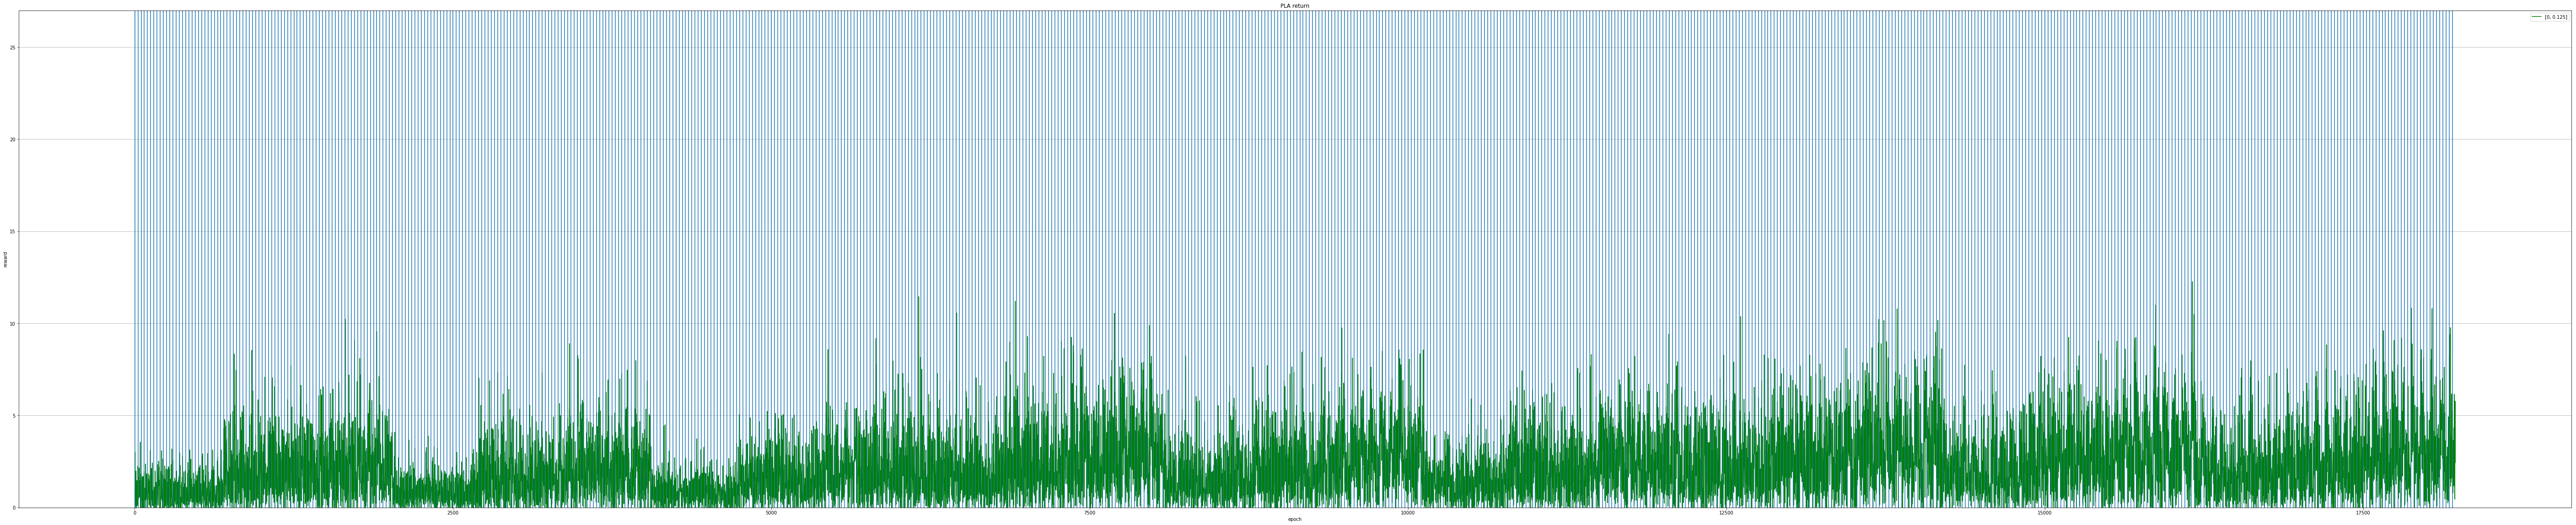

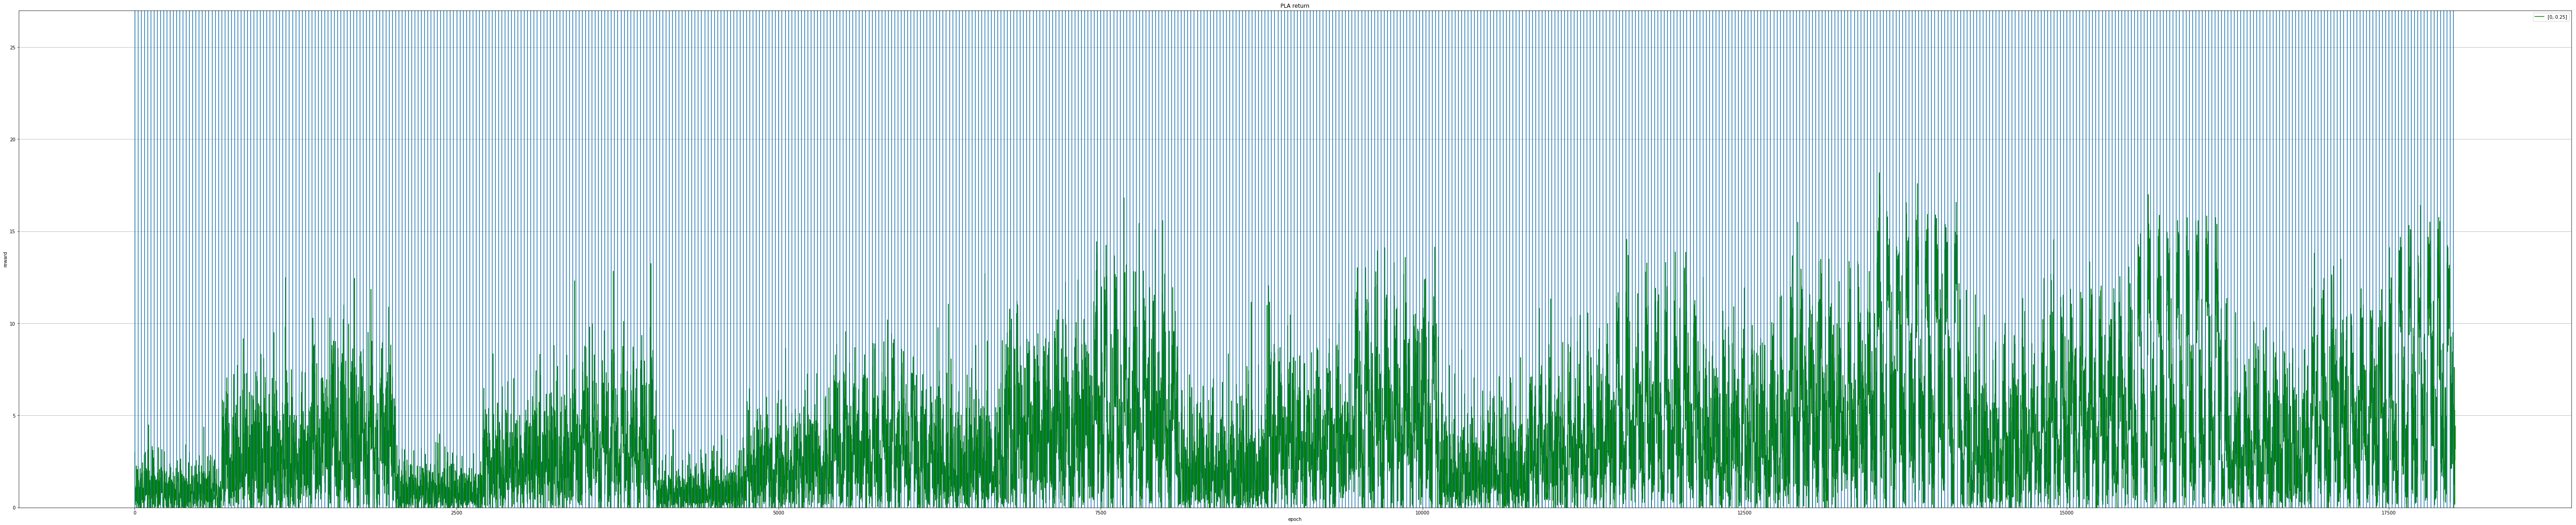

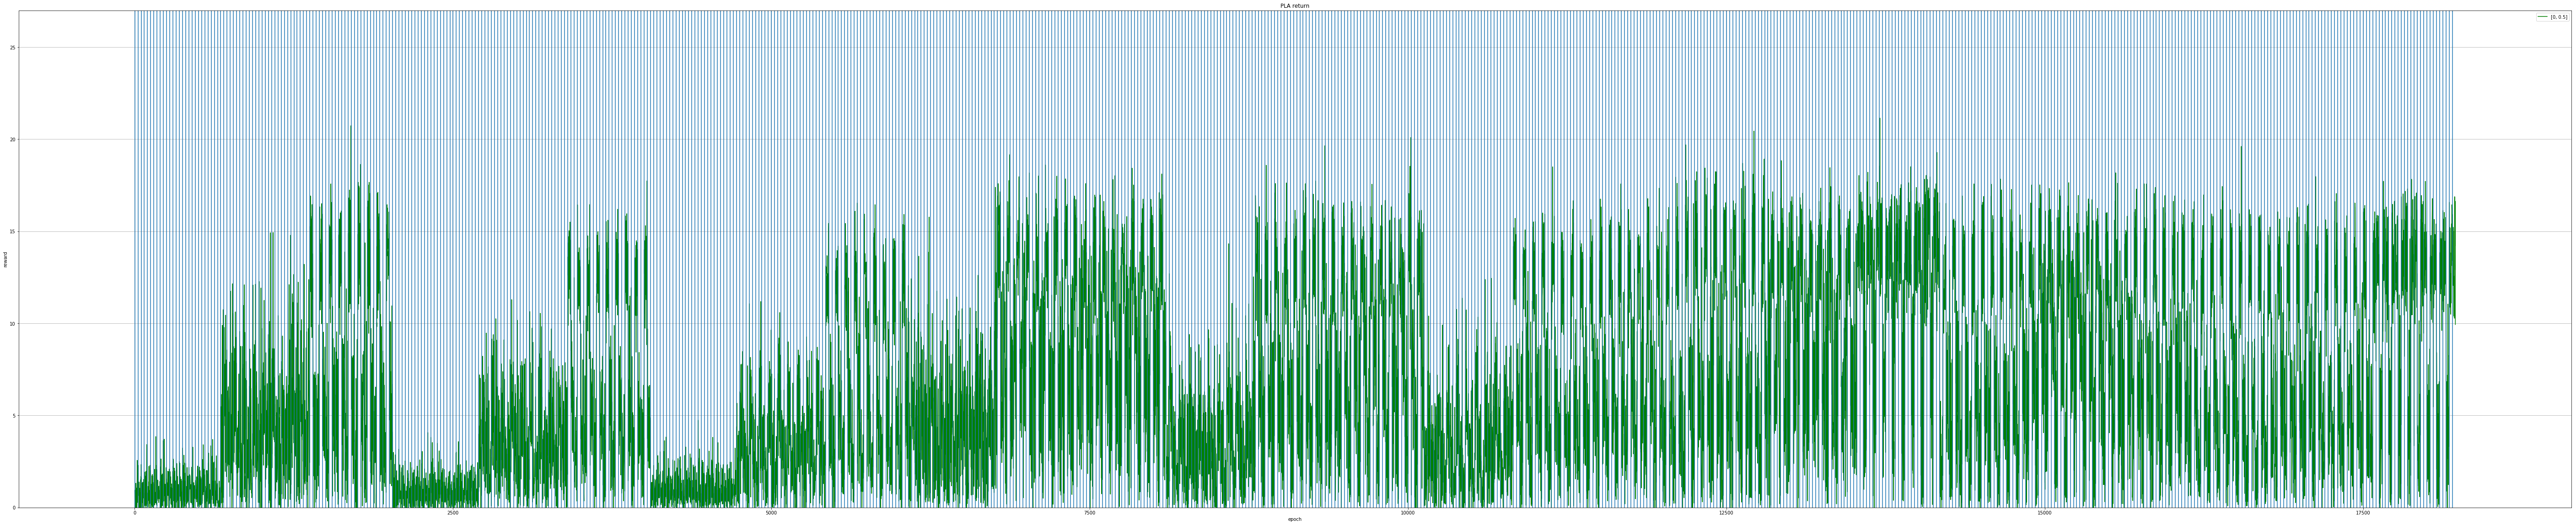

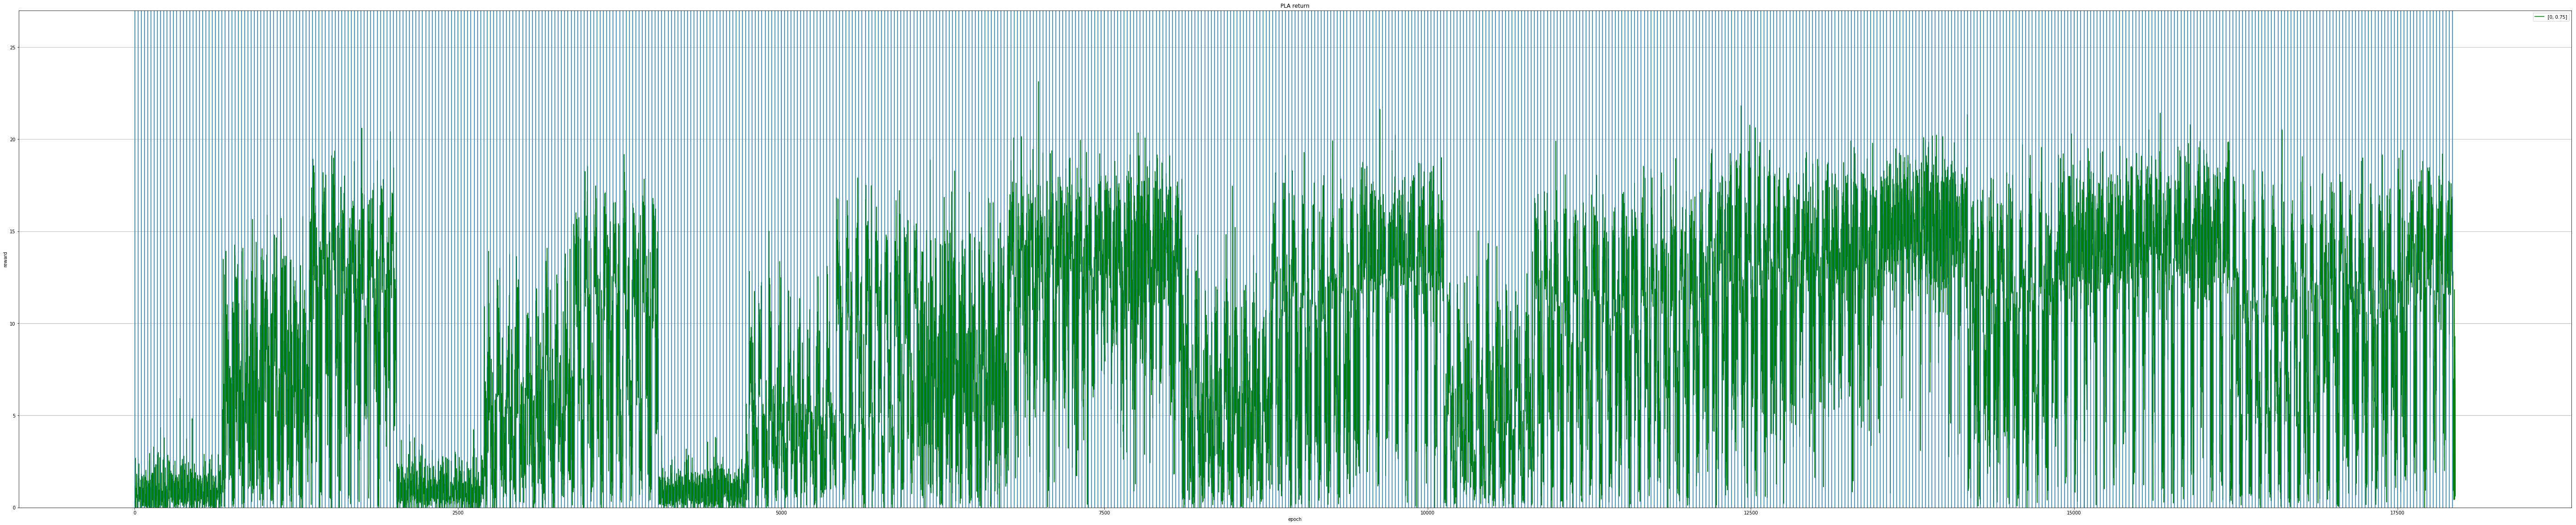

In [44]:
# Plot return
colors = ['g']
metric = "rollout/return"
me = metric.split('/')[1]
mode = "PLA"
for itv in interval:
    plt.figure(figsize=(100,20))
    plt.grid()
    data = all_combined_data[itv]
    length = data.shape[0]
    print(length)
    label = "[0, "+itv.replace("point","0.")+"]"
#     plt.fill_between(np.linspace(1,length,length), data[metric+"_avg"] - data[metric+"_std"],
#                  data[metric+'_avg'] + data[metric+'_std'], alpha=0.2,
#                  color=c)
    plt.plot(np.linspace(1,length,length), data[metric+'_avg'], '-', color=c,
         label=label)
    for xi in np.linspace(1,length,length)[::25]:
        plt.axvline(x=xi, ymin=-1, ymax=1)
    plt.legend(loc="best")
    plt.ylim([0,27])
    plt.title('{} {}'.format(mode,me))
    plt.xlabel("epoch")
    plt.ylabel("reward")
    plt.savefig(plot_save_dir+'{}_{}_{}.png'.format(itv,mode,me), bbox_inches='tight')


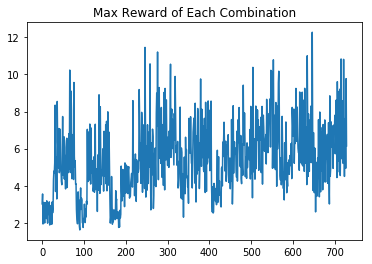

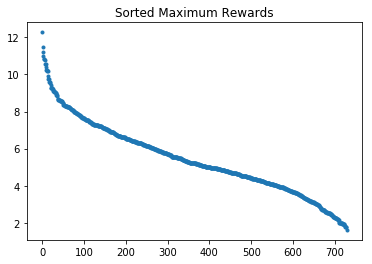

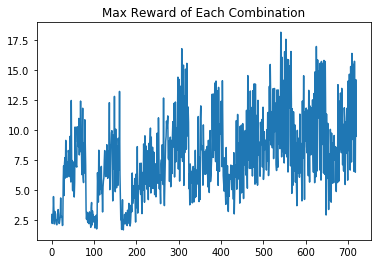

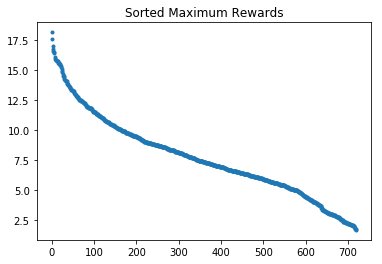

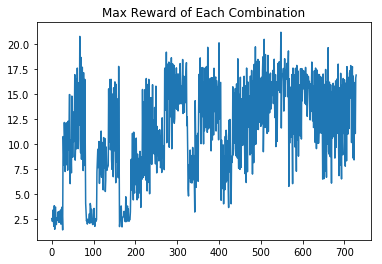

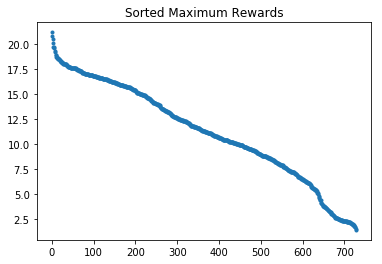

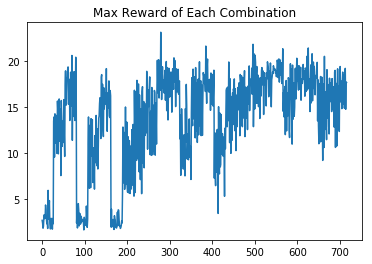

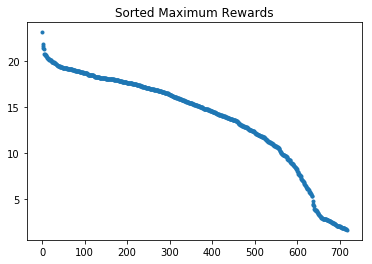

In [35]:
ep_per_comb = 25

max_rewards = pd.DataFrame()
for itv in interval:
    data = all_combined_data[itv]
    n_combination = int(all_combined_data[itv].shape[0] / ep_per_comb)
    combination_max = np.zeros((n_combination,))
    for i in range(n_combination):
        combination_max[i] = np.max(data["rollout/return_run0"][i*ep_per_comb:(i+1)*ep_per_comb])
    plt.figure()
    plt.plot(combination_max)
    plt.title("Max Reward of Each Combination")
    order = np.flip(np.argsort(combination_max), axis=0)
    max_rewards[itv+"_max_r"] = combination_max[order[:10]]
    max_rewards[itv+"_idx"] = order[:10]
    
    plt.figure()
    plt.plot(combination_max[order],'.')
    plt.title("Sorted Maximum Rewards")
    

In [34]:
max_rewards
max_rewards.to_csv("PLA_max_r_estimation.csv", index = False)

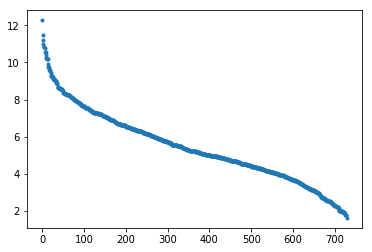

In [30]:
plt.plot(combination_max[order],'.')

In [17]:
order = np.flip(np.argsort(combination_max), axis=0)
order

array([728, 726, 725, 724, 723, 722, 721, 720, 719, 718, 727, 279, 496,
       385, 626, 566, 635, 499, 501,  70, 623, 664,  79, 310, 599, 557,
       389, 556, 559, 274, 553, 271, 312, 292, 530, 370, 439, 638, 647,
       554, 502, 562, 537, 584, 614, 632, 589, 531, 604, 544, 487, 277,
       640, 701, 505, 388, 283,  61, 608, 294, 361, 517, 280, 545, 619,
       493, 532, 298, 596, 713, 151, 307, 695, 316, 595, 586, 546, 548,
       355,  60, 320, 620, 634, 670, 547, 404, 689, 289, 700, 516, 616,
       476, 535,  55, 520, 625, 246, 550, 495,  75, 601, 313, 542, 688,
       303, 707,  67, 379, 641, 528, 523, 552, 317, 397, 519, 549, 543,
       561, 401, 466, 381, 140, 622, 617, 504, 646, 560, 709,  80, 508,
       644, 291, 288, 469, 380, 655, 551, 358, 541, 253, 315, 139, 658,
       563, 398, 605, 555, 534,  58, 514, 645, 579, 352, 400, 472, 511,
       676, 525, 319, 507, 526, 565, 643, 682, 611, 442, 615, 529, 580,
        59, 452, 629, 613, 395, 367, 490, 300,  64, 712, 306, 59

In [28]:
np.isnan(combination_max[-1] )

True

In [20]:
order[:10]

array([728, 726, 725, 724, 723, 722, 721, 720, 719, 718], dtype=int64)